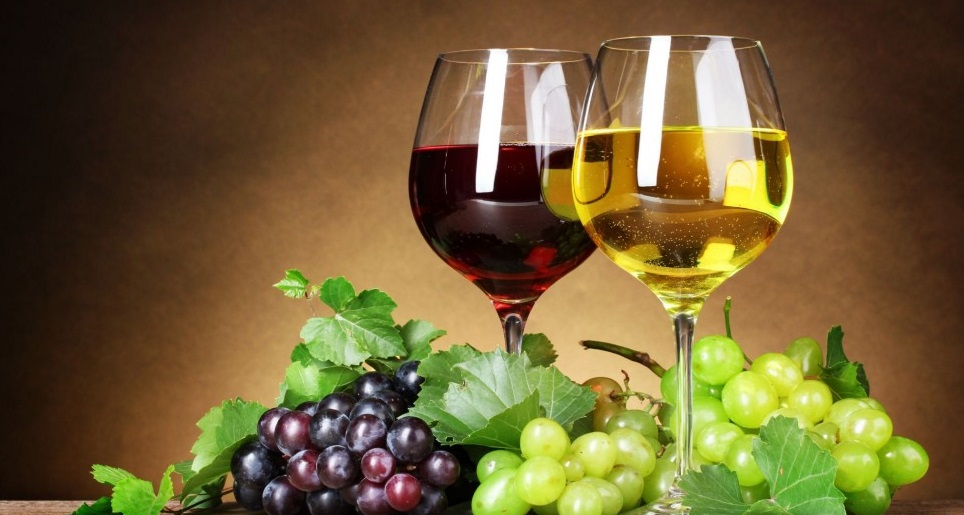

<a name="índice"></a>
# Índice
[Multi-layer Perceptron (MLP)](#rna)

# BUSINESS UNDERSTANDING

In [1]:
# Case de dados para CLASSIFICAÇÃO
# Identificar o tipo de vinho de acordo com as características de vinho tinto e branco presente na base de dados

# DATA UNDERSTANDING

In [2]:
# IA -> MACHINE LEARNING
# MODELO SUPERVISIONADO -> MÉTODO CLASSIFICAÇÃO
# Dados disponibilizadas no kaggle para efeito de estudo sobre o tipo de vinho com base nas características

[Wine dataset](https://www.kaggle.com/datasets/dell4010/wine-dataset)

# Title

In [3]:
# Classificação de binhos tinto e branco

# Head

In [4]:
# estudando machine learning
# by geanclm em 20/02/2022 at 11:47h
# update by geanclm on 24/10/2023

# Local files

In [5]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning

17/11/2023  15:18    <DIR>          .
29/10/2023  16:48    <DIR>          ..
24/10/2023  09:36                68 .gitattributes
03/11/2023  22:07    <DIR>          .ipynb_checkpoints
17/11/2023  15:18         1.054.663 CLASSIFICA€ÇO_vinhos_csv.ipynb
24/10/2023  09:36             1.091 LICENSE
24/10/2023  09:36                50 README.md
01/11/2023  13:01           131.951 Vinho-Tinto-e-Vinho-Branco.jpg
07/11/2023  16:35         9.618.537 wine_classifier_etc_2023-11-07.joblib
24/10/2023  09:36           384.016 wine_dataset.csv
               7 arquivo(s)     11.190.376 bytes
               3 pasta(s)   899.723.464.704 bytes dispon¡veis


# Library installation

In [6]:
# !pip install -U imbalanced-learn
# !pip install imblearn
# !pip install pyod

# Import libs

In [7]:
import sklearn

from datetime import datetime

# principais bibliotecas para lidar com dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# função para gerar o MODELO de machine learning
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# função para tratar os dados com rede neural
from sklearn.neural_network import MLPClassifier

# Validação cruzada
from sklearn.model_selection import GridSearchCV

# função para MÉTRICA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# função para VALIDAÇÃO do modelo
from sklearn.model_selection import train_test_split as tts

# balancemaneto dos dados em relação ao MAIOR valor de y
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# balancemaneto dos dados em relação ao MENOR valor de y
from imblearn.under_sampling import RandomUnderSampler

# Padronizar os dados
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

# biblioteca para persistir o modelo
import joblib

# identificar outliers
from pyod.models.knn import KNN

# Gráfico da Árvore
from sklearn.tree import plot_tree

In [8]:
sklearn.__version__

'1.3.0'

# Load data

In [9]:
df = pd.read_csv(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_dataset.csv')

# Exploratory Analysis

In [10]:
df.sample(15).T

4610     5378     3955     5959     3947     6190  \
fixed_acidity             6.6      6.5      7.1      7.3      8.3      7.0   
volatile_acidity         0.22     0.32     0.34     0.28     0.26     0.33   
citric_acid              0.36     0.45     0.32     0.35     0.31     0.78   
residual_sugar            5.5      7.7      2.0      1.6      2.0      9.9   
chlorides               0.029    0.022    0.051    0.054    0.029    0.042   
free_sulfur_dioxide      30.0     31.0     29.0     31.0     14.0     21.0   
total_sulfur_dioxide    105.0     97.0    130.0    148.0    141.0    251.0   
density               0.99206  0.99134  0.99354  0.99178  0.99077  0.99435   
pH                        3.2      3.2      3.3     3.18     2.95     3.01   
sulphates                0.47      0.7      0.5     0.47     0.77     0.55   
alcohol                  11.8     12.7     10.4     10.7     12.2     11.0   
quality                     6        7        6        5        6        6   
style                   white    white    white    white    white    white   

                         3972    844     2244    2605     5859    339   \
fixed_acidity             7.6     9.9     6.3     5.8      6.2    12.5   
volatile_acidity         0.48    0.25    0.26    0.36     0.36    0.28   
citric_acid              0.37    0.46    0.25    0.26     0.22    0.54   
residual_sugar            1.2     1.7     7.8     3.3     5.25     2.3   
chlorides               0.034   0.062   0.058   0.038    0.038   0.082   
free_sulfur_dioxide       5.0    26.0    44.0    40.0     44.0    12.0   
total_sulfur_dioxide     57.0    42.0   166.0   153.0    145.0    29.0   
density               0.99256  0.9959  0.9961  0.9911  0.99184  0.9997   
pH                       3.05    3.18    3.24    3.34     3.22    3.11   
sulphates                0.54    0.83    0.41    0.55      0.4    1.36   
alcohol                  10.4    10.6     9.0    11.3     11.2     9.8   
quality                     3       6       5       6        6       7   
style                   white     red   white   white    white     red   

                         5354    5068    3708  
fixed_acidity             7.8     7.6     7.7  
volatile_acidity         0.19    0.22    0.23  
citric_acid              0.32    0.28    0.31  
residual_sugar            7.4    12.0    10.7  
chlorides               0.015   0.056   0.038  
free_sulfur_dioxide      47.0    68.0    59.0  
total_sulfur_dioxide    124.0   143.0   186.0  
density               0.99278  0.9983  0.9969  
pH                       2.99    2.99    3.12  
sulphates                0.39     0.3    0.55  
alcohol                  11.0     9.2     9.5  
quality                     6       6       6  
style                   white   white   white

In [11]:
# filtrar dado específico do data frame
df.loc[0:4,'style']

0    red
1    red
2    red
3    red
4    red
Name: style, dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
df.dtypes[df.dtypes.values == 'object'].index

Index(['style'], dtype='object')

In [14]:
df.shape

(6497, 13)

In [15]:
df.describe().T

count        mean        std      min       25%  \
fixed_acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile_acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric_acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual_sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free_sulfur_dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total_sulfur_dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.29000    0.40000    1.58000  
citric_acid             0.31000    0.39000    1.66000  
residual_sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free_sulfur_dioxide    29.00000   41.00000  289.00000  
total_sulfur_dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

In [16]:
# verificar a existência de dados nulos
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [17]:
# Em caso de haver dados nulos analisar melhor estratégia para a situação pontual

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA PREPARATION
        </b>
    <br/>&nbsp;
</center>

In [18]:
df['style'] = df['style'].replace('red', 0) # vinho tinto
df['style'] = df['style'].replace('white', 1) # vinho branco

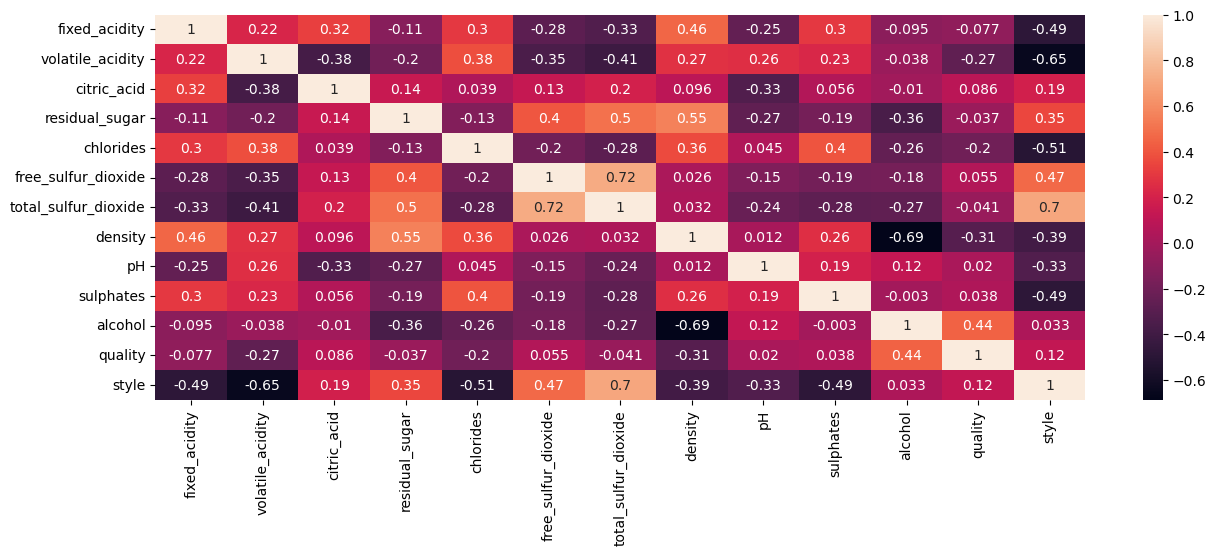

In [19]:
# Analisar a correlação entre as variáveis da base de dados
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True);

In [20]:
# 1 - VERIFICAR NECESSIDADE DE APLICAR O GET DUMMIES para cada base de dados
# df_d = pd.get_dummies(df)
# df_d.sample(5)

# DATA VISUALIZATION

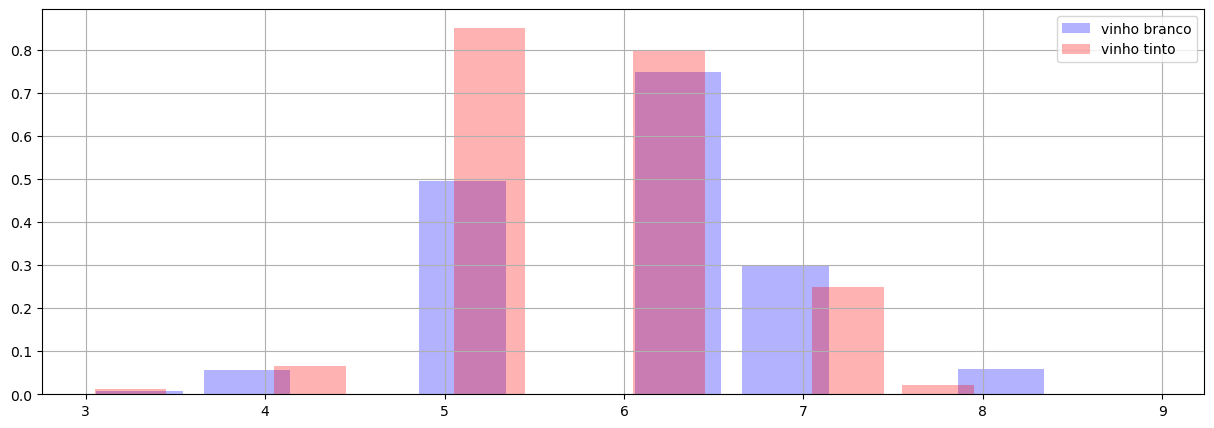

In [21]:
# ANALISANDO a qualidade geral dos vinhos em relação a característica tinto e branco
# (df.loc[df['style']== 1]).hist(figsize=(15,5));
# df['quality'].hist()

# min = df['quality'].min()
# max = df['quality'].max()
# bins = np.linspace(min,max, 6)

plt.figure(figsize=(15,5))
(df['quality'].loc[df['style']== 1]).hist(rwidth=0.80, color='b', alpha=.3, density=True, label='vinho branco') # vinhos branco
(df['quality'].loc[df['style']== 0]).hist(rwidth=0.80, color='r', alpha=.3, density=True, label='vinho tinto') # vinhos tinto;
plt.legend();

# Análise dos outliers (df)

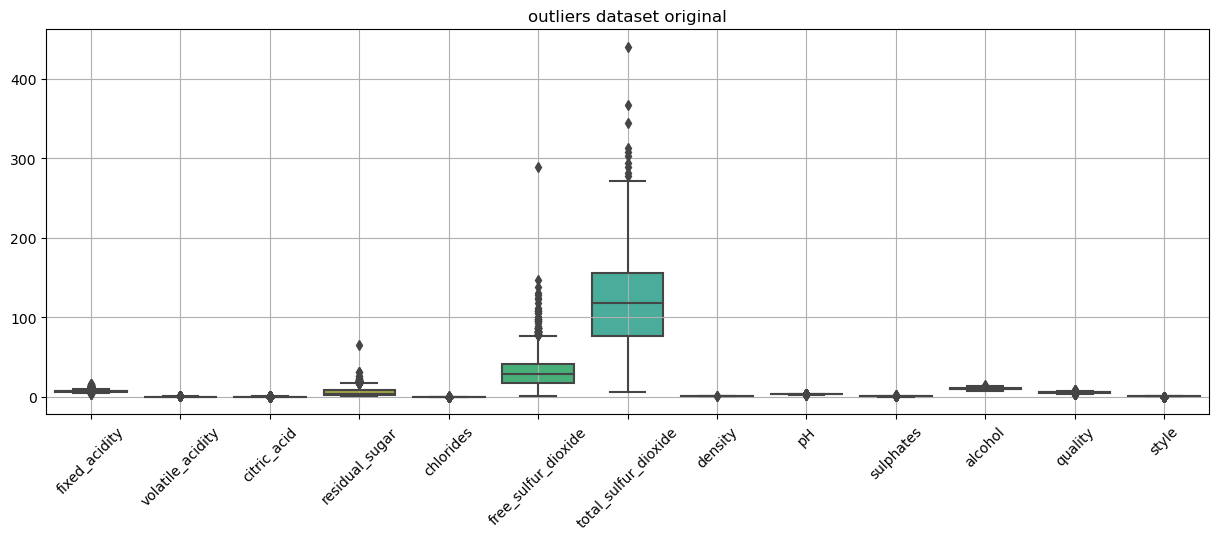

In [22]:
# Outliers data frame df
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('outliers dataset original')
plt.grid()
plt.show();

In [23]:
# LIMITE INFERIOR E SUPERIOR DO BOX PLOT DE VARIÁVEL ESPECÍFICA
var = 'total_sulfur_dioxide'
q1 = df[var].quantile(0.25)
q2 = df[var].quantile(0.5)
q3 = df[var].quantile(0.75)
amplitude = q3 - q1
limite_inferior = q1 - (1.5 * amplitude)
limite_superior = q3 + (1.5 * amplitude)
menor_valor_serie = df[var].min()
maior_valor_serie = df[var].max()
quant_dados_ALS = df.loc[df[var] > limite_superior].count()[0] # quantidade de dados acima do limite superior
quant_dados_BLI = df.loc[df[var] < limite_inferior].count()[0] # quantidade de dados abaixo do limite inferior
perc_ALS = (((df.loc[df[var] > limite_superior]).count()[0] / df[var].count())) * 100
perc_BLI = (((df.loc[df[var] < limite_inferior]).count()[0] / df[var].count())) * 100
box_splot = {
        'perc_BLI':[perc_BLI],
        'quant_dados_BLS':[quant_dados_BLI],
        'menor_valor_serie':[menor_valor_serie],
        'LI_box_splot':[limite_inferior],
        'q1':[q1],
        'q2':[q2],
        'q3':[q3],
        'LS_box_splot':[limite_superior],
        'maior_valor_serie':[maior_valor_serie],
        'quant_dados_ALS':[quant_dados_ALS],
        'perc_ALS':[perc_ALS]        
}
df_box_splot = pd.DataFrame(box_splot)
df_box_splot

perc_BLI  quant_dados_BLS  menor_valor_serie  LI_box_splot    q1     q2  \
0       0.0                0                6.0         -41.5  77.0  118.0   

      q3  LS_box_splot  maior_valor_serie  quant_dados_ALS  perc_ALS  
0  156.0         274.5              440.0               10  0.153917

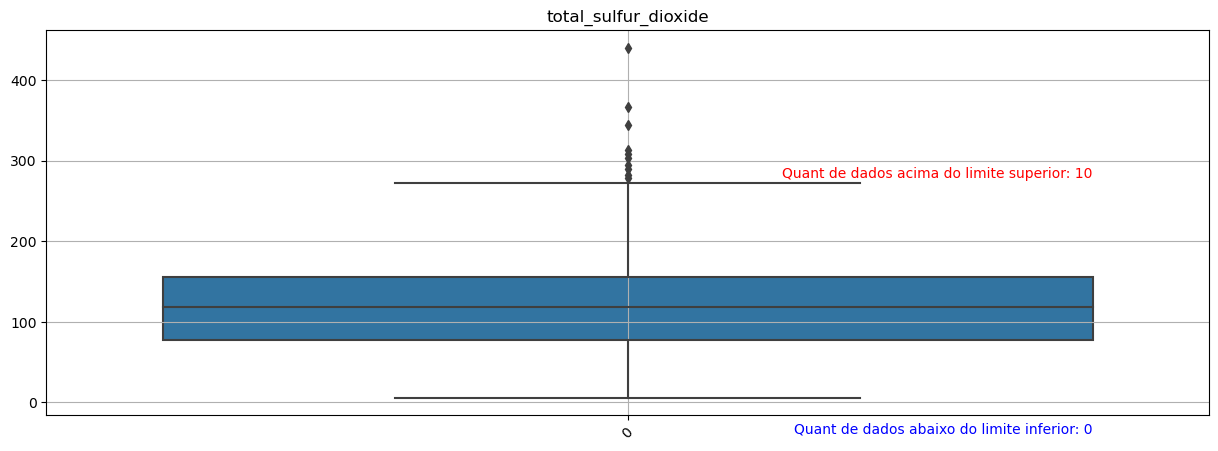

In [24]:
# Outliers var
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(var)
plt.text(0.4, limite_superior, f"Quant de dados acima do limite superior: {quant_dados_ALS}", ha='right',
         va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"Quant de dados abaixo do limite inferior: {quant_dados_BLI}", ha='right',
         va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

In [25]:
# Outliers acima do limite superior boxsplot var
df.loc[df[var] > limite_superior]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1079            7.9              0.30         0.68            8.30      0.050   
1081            7.9              0.30         0.68            8.30      0.050   
1924            7.5              0.27         0.31            5.80      0.057   
3016            8.6              0.55         0.35           15.55      0.057   
3530            7.1              0.49         0.22            2.00      0.047   
3726            9.1              0.33         0.38            1.70      0.062   
3977            9.4              0.23         0.56           16.45      0.063   
4253            6.9              0.40         0.22            5.95      0.081   
4751            7.6              0.25         1.23            4.60      0.035   
6344            6.1              0.26         0.25            2.90      0.047   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
1079                 37.5                 278.0  0.99316  3.01       0.51   
1081                 37.5                 289.0  0.99316  3.01       0.51   
1924                131.0                 313.0  0.99460  3.18       0.59   
3016                 35.5                 366.5  1.00010  3.04       0.63   
3530                146.5                 307.5  0.99240  3.24       0.37   
3726                 50.5                 344.0  0.99580  3.10       0.70   
3977                 52.5                 282.0  1.00098  3.10       0.51   
4253                 76.0                 303.0  0.99705  3.40       0.57   
4751                 51.0                 294.0  0.99018  3.03       0.43   
6344                289.0                 440.0  0.99314  3.44       0.64   

      alcohol  quality  style  
1079     12.3        7      0  
1081     12.3        7      0  
1924     10.5        5      1  
3016     11.0        3      1  
3530     11.0        3      1  
3726      9.5        5      1  
3977      9.3        5      1  
4253      9.4        5      1  
4751     13.1        6      1  
6344     10.5        3      1

In [26]:
# Instanciando o objeto KNN para detectar os outlers df
# Obs: um das formas de tratar outliers mas que não é a mais adequada ou a certa, pois depende do contexto dos dados
detector = KNN()

# Treinar o detector de OUTLIERS
detector.fit(df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [27]:
# 0 -> NÃO é outlier
# 1 -> outlier
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([5847,  650], dtype=int64))

In [29]:
# Cálculo da distância realizado para identificação do outlier
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([2.12212299, 2.71635787, 2.18040046, ..., 2.34466423, 3.08154044,
       2.51754346])

In [30]:
# Lista outliers
outliers = []
for i in range(len(previsoes)):    
    if previsoes[i] == 1:
        outliers.append(i)

# Filtrar as linhas outlier df
df_outliers = df.iloc[outliers,:]

In [31]:
# salvar versão df sem os outliers
df_sem_outliers = df.loc[~df.index.isin(outliers)]

In [32]:
# df_sem_outliers

In [33]:
df.shape, df_sem_outliers.shape

((6497, 13), (5847, 13))

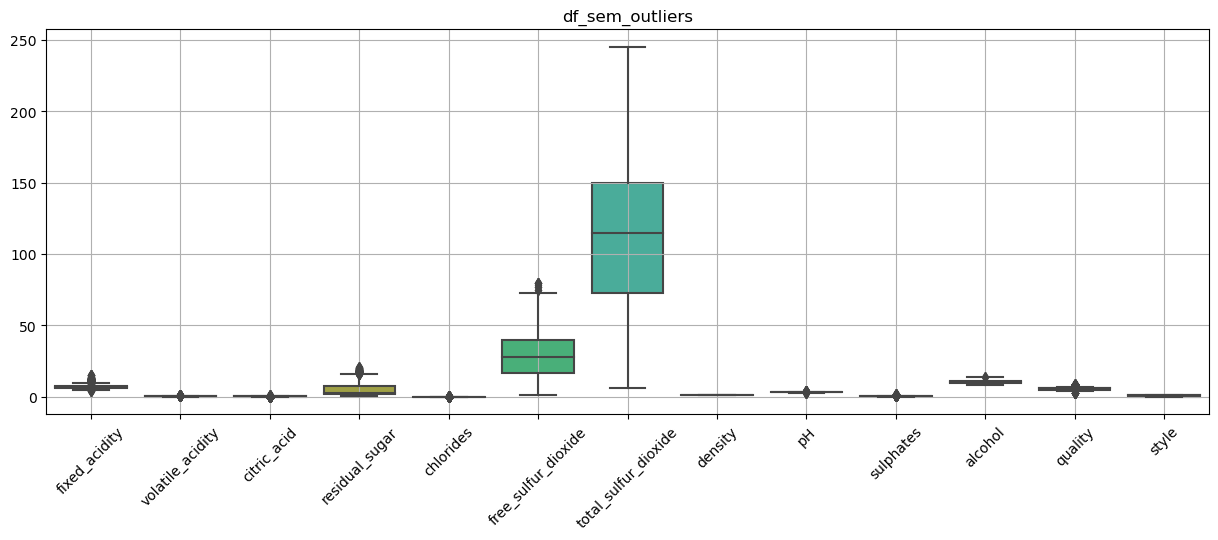

In [34]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('df_sem_outliers')
plt.grid()
plt.show();

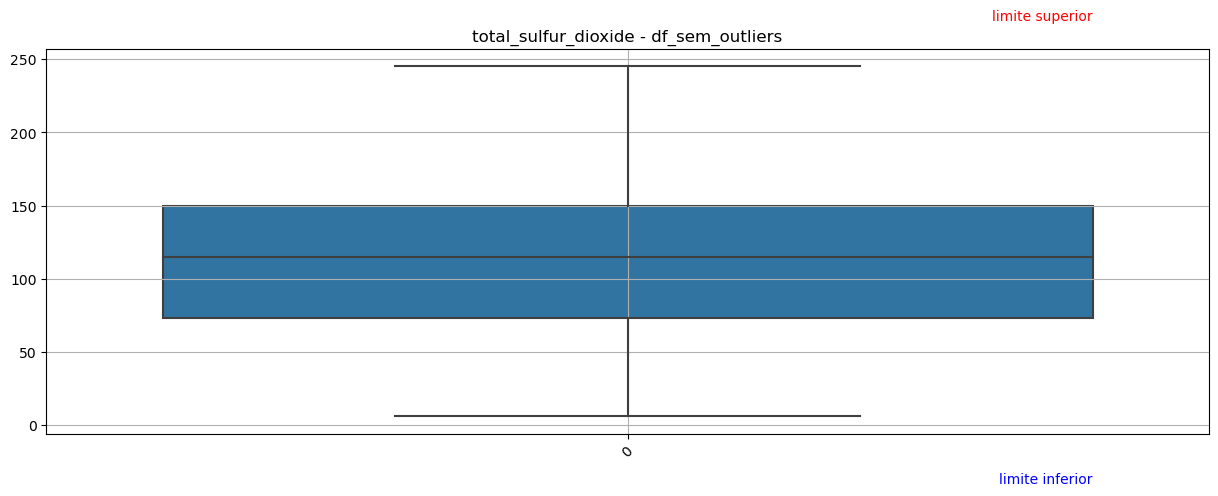

In [35]:
# Análise variável após tratamento dos outliers
var = 'total_sulfur_dioxide'
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_sem_outliers[var])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title(f'{var} - df_sem_outliers')
plt.text(0.4, limite_superior, f"limite superior", ha='right', va='bottom', fontsize=10, color='red')
plt.text(0.4, limite_inferior, f"limite inferior", ha='right', va='bottom', fontsize=10, color='blue')
plt.grid()
plt.show();

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            MODELING
        </b>
    <br/>&nbsp;
</center>

In [258]:
# dividir em df MODEL para treinar e testar o modelo e df VALIDAÇÃO para fins de simulando o mundo real
df_model, df_validation = tts(df_sem_outliers, test_size=0.25)

In [259]:
# Divisão dos dados em X e y a partir do df_tr (corresponde a 70% da base utilizada para treinar o modelo)
X = df_model.drop('style', axis = 1)
y = df_model['style']
X.shape, y.shape

((4385, 12), (4385,))

In [260]:
# Variável de validação final para o modelo gerado (corresponde a 30% dos dados simulando mundo real)
X_val = df_validation.drop('style', axis = 1)
y_val = df_validation['style']

In [317]:
df.groupby('style').size()[0], df.groupby('style').size()[1]

(1599, 4898)

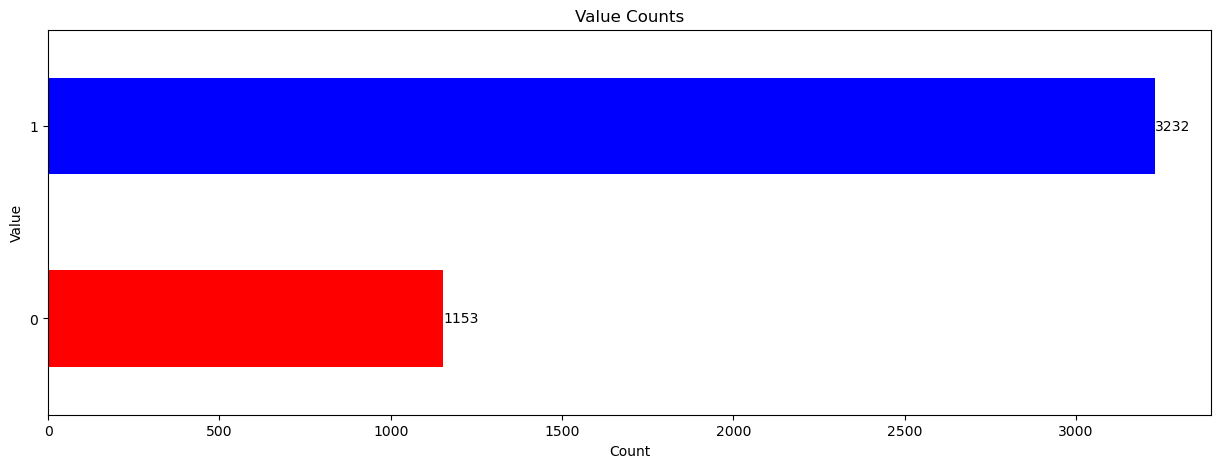

In [262]:
plt.figure(figsize=(15,5))
ax = y.value_counts(ascending=True).plot(kind ='barh', color = ['red','blue'])
ax.set_xlabel('Count')
ax.set_ylabel('Value')
ax.set_title('Value Counts')
ax.bar_label(ax.containers[0], label_type='edge');

In [263]:
# quantidade de 0 e 1 na variável y do df
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1153, 3232], dtype=int64))

In [264]:
percentual_0 = np.bincount(y)[0] / len(y) * 100
percentual_1 = np.bincount(y)[1] / len(y) * 100
percentual_0, percentual_1

(26.29418472063854, 73.70581527936146)

# Data balancing

In [265]:
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!

# balancemaneto dos dados com a geração de dados aleatórios na base minoritária de y
smote_ball = SMOTE()
X_bal, y_bal = smote_ball.fit_resample(X, y)

# balancemaneto dos dados com a remoção de dados da base majoritária de y
# rus = RandomUnderSampler()
# X_bal, y_bal = rus.fit_resample(X, y)

In [266]:
# y_bal.value_counts()

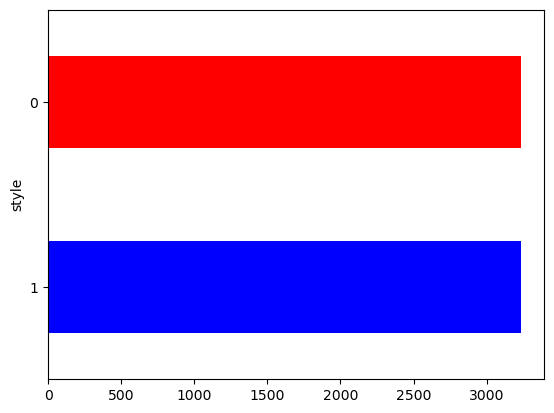

In [333]:
# variável y, balanceada, utilizada para TREINAR o modelo
y_bal.value_counts(ascending=True).plot(kind = 'barh', color = ['blue', 'red']);

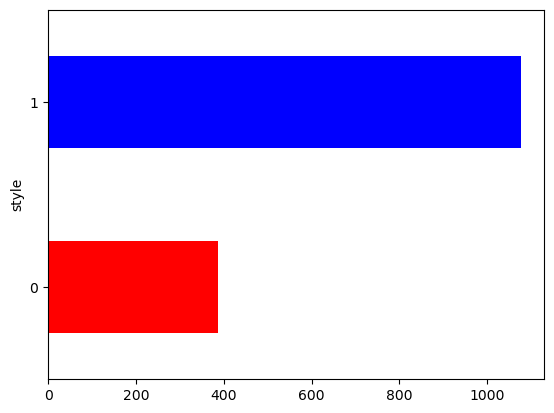

In [324]:
# Variável y, base de validação, utilizada para aplicar situações novas ao modelo já treinado e simulando vida real
y_val.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

# Standardization

In [269]:
# Padronizar X_bal do X do df_tr
obj_padronizado = StandardScaler().fit(X_bal)
X_bal_padronizado = obj_padronizado.transform(X_bal)
X_bal_padronizado = pd.DataFrame(X_bal_padronizado)
X_bal_padronizado.columns = list(X_bal.columns)

In [270]:
X_bal_padronizado.tail()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
6459       1.087398          0.526172     0.006361       -0.591873  -0.037044   
6460       0.588721          1.885254    -0.006110        0.004834   0.237351   
6461       1.059509          0.075501     1.912225       -0.514608   0.633704   
6462       1.223023          0.611070     0.753959       -0.371344   0.457875   
6463       2.444933         -0.014761     1.381862       -0.688914   0.348596   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
6459            -1.086992             -1.283864  0.916806  0.426627   
6460            -0.829268             -1.301225  0.507091  1.176739   
6461            -1.006963             -0.843704  1.048376  1.299570   
6462             0.052544             -0.661912  0.821777 -0.061316   
6463            -0.186176             -0.853013  0.587313 -1.132421   

      sulphates   alcohol   quality  
6459   0.869617  0.002531  0.351414  
6460   0.662560  0.912462  0.351414  
6461   0.602148  0.295779 -0.832295  
6462   0.425585  0.498417  0.351414  
6463   1.271738 -0.329486  1.535123

In [271]:
# df_padronizado.describe().T

In [272]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_padronizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [273]:
# Padronizar X_val (origem no df_ts correspondente a 30% dos dados do df para teste do modelo)
obj_padronizado = StandardScaler().fit(X_val)
X_val_padronizado = obj_padronizado.transform(X_val)
X_val_padronizado = pd.DataFrame(X_val_padronizado)
X_val_padronizado.columns = list(X_val.columns)
X_val_padronizado.tail()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
1457      -1.108014         -0.362520    -0.962630       -0.891706   0.072546   
1458       0.367249          0.989532    -0.241681       -0.682705   1.009146   
1459      -0.409205         -0.891584     0.551363       -0.938150  -0.767165   
1460       0.056667         -0.480090     0.046699       -0.891706  -0.476496   
1461      -0.020978         -0.244950    -0.385870       -0.822039  -0.476496   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
1457            -1.411577             -0.050228 -0.605652  0.028288   
1458            -0.373143             -1.060274  1.176826  1.204591   
1459            -0.957262             -0.742297 -1.914659  0.523573   
1460             0.016270             -0.312092 -1.684887 -0.962284   
1461             1.119606              1.259090 -1.072160 -0.219355   

      sulphates   alcohol   quality  
1457   0.289478 -0.799285 -2.185368  
1458   1.317327 -1.095685 -1.000715  
1459  -0.995333  2.122364  1.368590  
1460  -0.545649  1.275509  0.183937  
1461   0.160997  0.682711  0.183937

# Normalization

In [274]:
# obj_normalizado = MinMaxScaler().fit(X_bal)
# df_normalizado = obj_normalizado.transform(X_bal)
# df_normalizado = pd.DataFrame(df_normalizado)
# df_normalizado.columns = list(X_bal.columns)
# df_normalizado.head()

In [275]:
# df_normalizado.describe().T

In [276]:
# plt.figure(figsize=(15,5))
# ax = sns.boxplot(data=df_normalizado)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

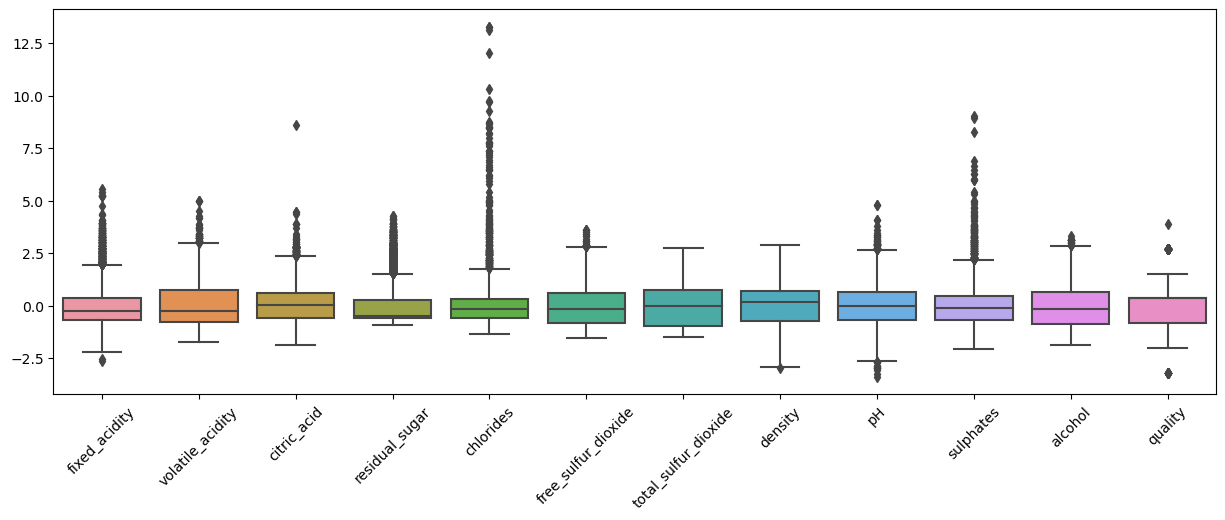

In [277]:
# Analisar os outliers
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_bal_padronizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts

In [278]:
# Separar df_model - balanceado e padronizado - em X_tr, X_ts, y_tr, y_ts
PREDICTOR = X_bal_padronizado
TARGET = y_bal
X_tr, X_ts, y_tr, y_ts = tts(PREDICTOR,TARGET, test_size= 0.3)

In [279]:
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape, y_tr.value_counts()[0], y_tr.value_counts()[1]

((4524, 12), (1940, 12), (4524,), (1940,), 2284, 2240)

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Extra Trees Classifier
        </b>
    <br/>&nbsp;
</center>

[ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

In [280]:
# Treinar o modelo
etc = ExtraTreesClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
etc.fit(X_tr, y_tr)
etc_y_pred = etc.predict(X_ts)

In [281]:
# PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
# etc.predict_proba(X_ts)

In [282]:
# pd.DataFrame(etc.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1']).head()

# EVALUATION

In [283]:
# Max e Min
etc_y_pred.min(), etc_y_pred.max()

(0, 1)

In [284]:
# Curva ROC
roc_auc_score(y_ts, etc_y_pred)

0.9963314107799102

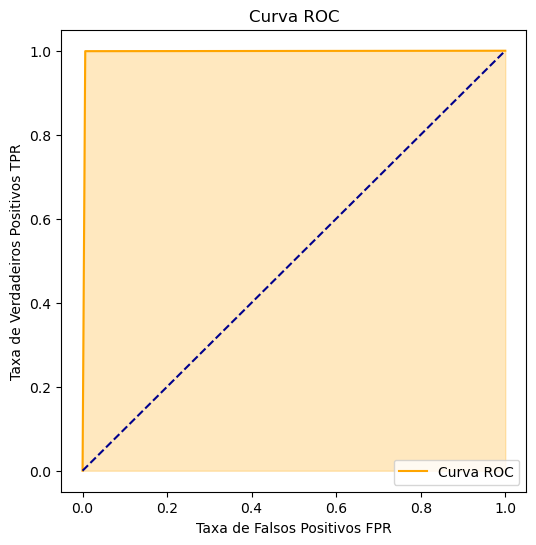

AUC: 1.00


In [285]:
# Calculando a curva ROC
# A curva ROC é um gráfico que representa a taxa de verdadeiros positivos (TPR)
# em função da taxa de falsos positivos (FPR) para diferentes valores de limiar de classificação.

fpr, tpr, thresholds = roc_curve(y_ts, etc_y_pred)

# Plotando a curva ROC
color = 'orange'
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color=color, label='Curva ROC')
plt.fill_between(fpr, tpr, color=color, alpha=.25)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos FPR')
plt.ylabel('Taxa de Verdadeiros Positivos TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Calculando a área sob a curva (AUC)
# A área sob a curva ROC (AUC-ROC) é uma métrica resumida que quantifica o desempenho global do modelo.
# Um valor de AUC-ROC próximo a 1 indica um bom modelo, enquanto um valor próximo a 0,5 indica um desempenho aleatório.
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

In [286]:
# SCORE
etc_acuracia = etc.score(X_ts, y_ts)
print("score AUTO:", etc_acuracia)

score AUTO: 0.9963917525773196


In [287]:
# ACURÁCIA
etc_acuracia = accuracy_score(y_ts, etc_y_pred)
print("accuracy_score AUTO:", etc_acuracia)

accuracy_score AUTO: 0.9963917525773196


In [288]:
# PRECISION
# A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas
etc_precision = precision_score(y_ts, etc_y_pred)
print("precision_score:", etc_precision)

precision_score: 0.9939819458375125


In [289]:
# RECALL
# A revocação (sensibilidade ou recall) é uma métrica que indica, das amostras positivas existentes,
# quantas o modelo conseguiu classificar corretamente.
etc_recall = recall_score(y_ts, etc_y_pred)
print("etc_recall:", etc_recall)

etc_recall: 0.998991935483871


In [290]:
# MATRIZ CONFUSÃO
etc_confusion_matrix = confusion_matrix(y_ts, etc_y_pred)
etc_confusion_matrix

array([[942,   6],
       [  1, 991]], dtype=int64)

|                     |  PRED = 0          |           PRED = 1   |
|-                    |--------------------|----------------------|
| *REAL = 0*          |      VN            |             FP       |
| *REAL = 1*          |      FN            |             VP       |

In [251]:
# CÁLCULO MANUAL DA ACURÁCIA
# com base nos valores da matriz confusão
etc_acuracia_manual = (etc_confusion_matrix[0][0] + etc_confusion_matrix[1][1])/(etc_confusion_matrix[0][0] + etc_confusion_matrix[0][1] + etc_confusion_matrix[1][0] + etc_confusion_matrix[1][1])
print(f'Acurácia MANUAL:, {etc_acuracia_manual}')

Acurácia MANUAL:, 0.9954689623923878


In [252]:
# print(classification_report(y_ts, etc_y_pred))

In [253]:
etc_f1_score = f1_score(y_ts, etc_y_pred)
etc_f1_score

0.995571302037201

In [254]:
# X_ts[400:410].T
X_val_padronizado[400:410].T

400       401       402       403       404  \
fixed_acidity         0.421663 -0.571107 -0.952942  3.552709  0.268929   
volatile_acidity      1.150185  0.720363 -0.446297  2.163336  0.106331   
citric_acid           0.079182  0.637107 -0.339261  1.473994 -0.060299   
residual_sugar       -0.643314  2.386117 -0.811616 -0.432937 -0.790578   
chlorides             0.681260  0.797578 -0.307435  2.077066  0.652181   
free_sulfur_dioxide  -0.343914  1.561509  0.091611 -1.269406 -0.235033   
total_sulfur_dioxide  0.496570  1.871832 -0.050009 -1.672113 -0.896324   
density               0.617436  1.539302 -0.773745  1.505780  0.821923   
pH                    0.531605 -0.234170  1.233565 -0.297985  1.552638   
sulphates             0.427950  0.297416 -0.159452  1.994353  0.558483   
alcohol              -0.849225 -1.265960 -0.015755  1.401145 -0.849225   
quality              -0.953375 -0.953375  1.346899  1.346899  0.196762   

                           405       406       407       408       409  
fixed_acidity         0.039828 -0.571107 -0.571107 -0.571107 -0.036539  
volatile_acidity     -0.262087  0.167734 -0.753313  0.720363  0.044928  
citric_acid           0.079182  0.079182 -0.897186 -1.245889 -0.409002  
residual_sugar       -0.664352 -0.411899 -0.916804 -0.643314 -0.769540  
chlorides            -0.394673 -0.598228  0.215992  1.669956  0.768498  
free_sulfur_dioxide  -0.126152 -0.398355  0.309374 -1.160524  0.146052  
total_sulfur_dioxide  0.161570 -0.420271  1.325254 -1.390007 -0.720008  
density              -1.296695 -1.122378 -0.582667  0.875558  0.701242  
pH                    0.786863 -0.234170 -1.063759  2.828929  1.169750  
sulphates            -0.616320 -1.007921 -0.224719  0.754284  0.297416  
alcohol               1.734533  0.567675 -0.849225 -0.599184 -0.849225  
quality               1.346899  0.196762  0.196762 -0.953375  0.196762

# Testar o modelo com dados da base df_validation

In [306]:
# segmento da base y_ts que serve para validar o modelo
# selection_y_ts = list(y_ts[400:410].values)
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print (validation, end=' ')

In [307]:
# aplicação do modelo para predizer resultados com base na base treino e modelo gerado
prediction = list(etc.predict(X_val_padronizado[start:end]))
# prediction = list(etc.predict(X_ts[400:410]))
# print(prediction, end=' ')

In [308]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO preditos corretamente!')
    display(dfp.prediction.value_counts())
    display(dfp)
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

1462 registros lidos
44 tipo(s) de vinho(s) NÃO preditos corretamente!


prediction
0    43
1     1
Name: count, dtype: int64

seq  validation  prediction
0     25           1           0
1     70           1           0
2     89           1           0
3    122           1           0
4    170           1           0
5    189           1           0
6    225           1           0
7    298           1           0
8    324           1           0
9    339           1           0
10   341           1           0
11   360           1           0
12   376           1           0
13   394           1           0
14   409           1           0
15   430           1           0
16   472           1           0
17   537           1           0
18   546           1           0
19   561           1           0
20   596           1           0
21   617           1           0
22   624           1           0
23   637           1           0
24   678           1           0
25   730           1           0
26   765           1           0
27   874           0           1
28   887           1           0
29   893           1           0
30   956           1           0
31   968           1           0
32   993           1           0
33  1025           1           0
34  1056           1           0
35  1072           1           0
36  1124           1           0
37  1140           1           0
38  1178           1           0
39  1195           1           0
40  1280           1           0
41  1376           1           0
42  1402           1           0
43  1434           1           0

# VISUAL

In [76]:
# PROPENSÃO (NÃO É probabilidade)
pred = etc.predict_proba(X_ts)[:,1]

In [77]:
pred.min(), pred.max()

(0.0031084507985836667, 0.9966438019927446)

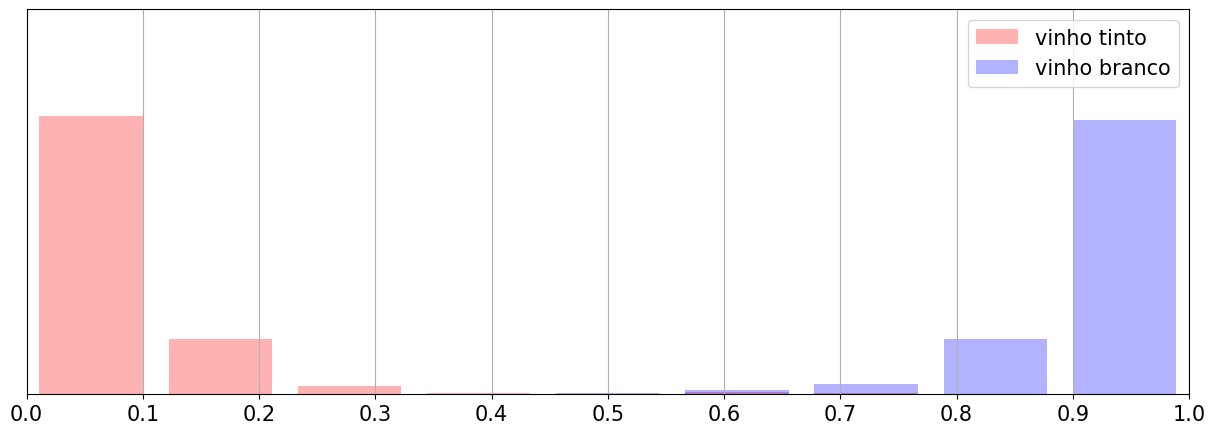

In [78]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0,1,10), density=True, color='r', alpha=.3, rwidth=.8, label='vinho tinto')
plt.hist(pred[y_ts==1], bins=np.linspace(0,1,10), density=True, color='b', alpha=.3, rwidth=.8, label='vinho branco')

plt.xlim(0, 1)
plt.ylim(0, 10)

plt.xticks(np.arange(0,1.1,0.1), fontsize=15)
plt.yticks([])
plt.legend(fontsize=15)
plt.grid();

# PERSISTENCE

In [79]:
# Salvar modelo em arquivo
# current_date = datetime.today().strftime('%Y-%m-%d')
# name = "wine_classifier_etc_"
# file_name = f'{name}{current_date}.joblib'
# file_path = fr'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\{file_name}'
# joblib.dump(etc, file_path)

In [80]:
# Carregar Modelo Salvo
# model = joblib.load(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')
# prediction_persistence = model.predict(X_ts[400:410])
# print(list(prediction_persistence))

# DEPLOYMENT

In [81]:
# Criar tela no Streamlit para aplciar o modelo em situação de produção
# receber arquivo com dados em upload e retornar resultado na tela com tipo de vinho

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [82]:
# Treinar o modelo
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [83]:
neigh_y_pred = neigh.predict(X_ts)

In [84]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)
neigh_confusion_matrix

array([[1047,    3],
       [   8,  993]], dtype=int64)

In [85]:
# ACURÁCIA
neigh_acuracia = accuracy_score(y_ts, neigh_y_pred)
print("Acurácia:", neigh_acuracia)

Acurácia: 0.9946367625548513


In [86]:
print(classification_report(y_ts, neigh_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1050
           1       1.00      0.99      0.99      1001

    accuracy                           0.99      2051
   macro avg       0.99      0.99      0.99      2051
weighted avg       0.99      0.99      0.99      2051



In [87]:
neigh_f1_score = f1_score(y_ts, neigh_y_pred)
neigh_f1_score

0.9944917376064096

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Decision Tree Classifier
        </b>
    <br/>&nbsp;
</center>

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

# VALIDAÇÃO CRUZADA

In [88]:
params = {
    'max_leaf_nodes': np.power(2, (np.arange(1, 12, 1))),
    'criterion': ['gini','entropy']
}
grid = GridSearchCV(
    DecisionTreeClassifier(),
    params,                                    
    cv=10,                                     
    scoring='roc_auc',
    verbose=5,
)

In [89]:
print(grid)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)


In [90]:
# Treinar o modelo
# dtc = DecisionTreeClassifier()
# dtc.fit(X_tr, y_tr)
grid.fit(X_tr, y_tr)

Fitting 10 folds for each of 22 candidates, totalling 220 fits
[CV 1/10] END .criterion=gini, max_leaf_nodes=2;, score=0.929 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=2;, score=0.948 total time=   0.0s
[CV 3/10] END .criterion=gini, max_leaf_nodes=2;, score=0.931 total time=   0.0s
[CV 4/10] END .criterion=gini, max_leaf_nodes=2;, score=0.919 total time=   0.0s
[CV 5/10] END .criterion=gini, max_leaf_nodes=2;, score=0.923 total time=   0.0s
[CV 6/10] END .criterion=gini, max_leaf_nodes=2;, score=0.923 total time=   0.0s
[CV 7/10] END .criterion=gini, max_leaf_nodes=2;, score=0.931 total time=   0.0s
[CV 8/10] END .criterion=gini, max_leaf_nodes=2;, score=0.918 total time=   0.0s
[CV 9/10] END .criterion=gini, max_leaf_nodes=2;, score=0.929 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2;, score=0.929 total time=   0.0s
[CV 1/10] END .criterion=gini, max_leaf_nodes=4;, score=0.961 total time=   0.0s
[CV 2/10] END .criterion=gini, max_leaf_nodes=

[CV 4/10] END criterion=gini, max_leaf_nodes=2048;, score=0.977 total time=   0.0s
[CV 5/10] END criterion=gini, max_leaf_nodes=2048;, score=0.983 total time=   0.0s
[CV 6/10] END criterion=gini, max_leaf_nodes=2048;, score=0.983 total time=   0.0s
[CV 7/10] END criterion=gini, max_leaf_nodes=2048;, score=0.987 total time=   0.0s
[CV 8/10] END criterion=gini, max_leaf_nodes=2048;, score=0.985 total time=   0.0s
[CV 9/10] END criterion=gini, max_leaf_nodes=2048;, score=0.977 total time=   0.0s
[CV 10/10] END criterion=gini, max_leaf_nodes=2048;, score=0.994 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=2;, score=0.929 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=2;, score=0.948 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=2;, score=0.931 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=2;, score=0.919 total time=   0.0s
[CV 5/10] END criterion=entropy, max_leaf_nodes=2;, score=0.923 total time=   0.0s
[CV

[CV 3/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.994 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.990 total time=   0.0s
[CV 5/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.987 total time=   0.0s
[CV 6/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.981 total time=   0.0s
[CV 7/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.983 total time=   0.0s
[CV 8/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.985 total time=   0.0s
[CV 9/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.989 total time=   0.0s
[CV 10/10] END criterion=entropy, max_leaf_nodes=1024;, score=0.996 total time=   0.0s
[CV 1/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.975 total time=   0.0s
[CV 2/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.996 total time=   0.0s
[CV 3/10] END criterion=entropy, max_leaf_nodes=2048;, score=0.994 total time=   0.0s
[CV 4/10] END criterion=entropy, max_leaf_nodes=2048;

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024, 2048],
      dtype=int32)},
             scoring='roc_auc', verbose=5)

In [91]:
grid.best_params_, grid.best_score_, grid.best_estimator_

({'criterion': 'entropy', 'max_leaf_nodes': 16},
 0.9897132286930506,
 DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=16))

In [92]:
dtc_y_predct_proba = grid.predict_proba(X_ts)[:,1]

In [93]:
dtc_y_predct_proba

array([5.04795558e-04, 9.82758621e-01, 5.04795558e-04, ...,
       9.97925311e-01, 5.04795558e-04, 9.72972973e-01])

In [94]:
# dtc_y_pred = dtc.predict(X_ts)
dtc_y_pred = grid.predict(X_ts)
dtc_y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

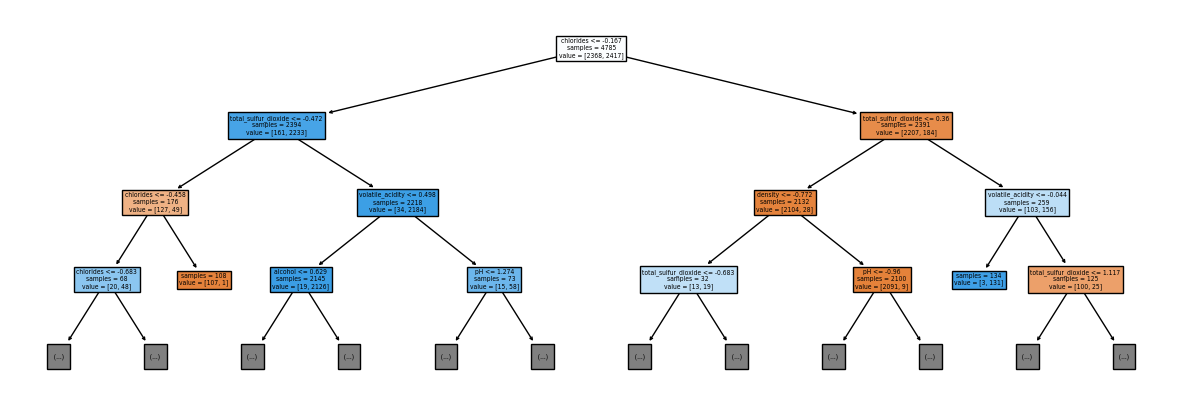

In [95]:
# tree = DecisionTreeClassifier(max_depth = 3, min_samples_split = 150)
# tree.fit(X, y)
# plt.figure(figsize = (15, 5))
# plot_tree(tree, filled=True, proportion = False, impurity = False, feature_names=list(X_tr.columns))
# plt.show();

plt.figure(figsize = (15, 5))
plot_tree(grid.best_estimator_, max_depth = 3, filled=True,
          proportion = False, impurity = False, feature_names=list(X_tr.columns))
plt.show();

In [96]:
# ROC score
roc_auc_score(y_ts, dtc_y_pred)

0.9854578754578756

In [97]:
# MATRIZ CONFUSÃO
dtc_confusion_matrix = confusion_matrix(y_ts, dtc_y_pred)
dtc_confusion_matrix

array([[1031,   19],
       [  11,  990]], dtype=int64)

In [98]:
# ACURÁCIA
dtc_acuracia = accuracy_score(y_ts, dtc_y_pred)
print("Acurácia:", dtc_acuracia)

Acurácia: 0.985372988785958


In [99]:
print(classification_report(y_ts, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1050
           1       0.98      0.99      0.99      1001

    accuracy                           0.99      2051
   macro avg       0.99      0.99      0.99      2051
weighted avg       0.99      0.99      0.99      2051



In [100]:
dtc_f1_score = f1_score(y_ts, dtc_y_pred)
dtc_f1_score

0.9850746268656717

# Testar o modelo com dados da base df_validation

In [212]:
validation = list(y_val[0:440].values)
# print(validation)

In [213]:
prediction = list(grid.predict(X_val_padronizado[0:440]))
# print(prediction)

In [214]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])    
    display (dfp)
#     display (dfp.prediction.value_counts())
else:
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

seq  validation  prediction
0     1           1           0
1     2           1           0
2    15           1           0
3    16           1           0
4    29           1           0
..  ...         ...         ...
60  397           1           0
61  411           1           0
62  423           1           0
63  428           1           0
64  435           1           0

[65 rows x 3 columns]

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [104]:
# Treinar o modelo
lr = LogisticRegression(random_state=0, max_iter =1500)
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=1500, random_state=0)

In [105]:
lr_y_pred = lr.predict(X_ts)

In [106]:
# MATRIZ CONFUSÃO
lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)
lr_confusion_matrix

array([[1042,    8],
       [   5,  996]], dtype=int64)

In [107]:
# ACURÁCIA
lr_acuracia = accuracy_score(y_ts, lr_y_pred)
print("Acurácia:", lr_acuracia)

Acurácia: 0.9936616284739151


In [108]:
print(classification_report(y_ts, lr_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1050
           1       0.99      1.00      0.99      1001

    accuracy                           0.99      2051
   macro avg       0.99      0.99      0.99      2051
weighted avg       0.99      0.99      0.99      2051



In [109]:
lr_f1_score = f1_score(y_ts, lr_y_pred)
lr_f1_score

0.9935162094763091

In [110]:
prediction = list(lr.predict(X_ts[400:410]))
print(prediction)

[0, 0, 1, 1, 0, 0, 1, 1, 0, 1]


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Random Forest Classifier
        </b>
    <br/>&nbsp;
</center>

[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [111]:
rf = RandomForestClassifier(n_estimators=1_000, max_depth=8, n_jobs=-1)
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

In [112]:
rf_y_pred = lr.predict(X_ts)

In [113]:
# MATRIZ CONFUSÃO
rf_confusion_matrix = confusion_matrix(y_ts, rf_y_pred)
rf_confusion_matrix

array([[1042,    8],
       [   5,  996]], dtype=int64)

In [114]:
# ACURÁCIA
rf_acuracia = accuracy_score(y_ts, rf_y_pred)
print("Acurácia:", rf_acuracia)

Acurácia: 0.9936616284739151


In [115]:
print(classification_report(y_ts, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1050
           1       0.99      1.00      0.99      1001

    accuracy                           0.99      2051
   macro avg       0.99      0.99      0.99      2051
weighted avg       0.99      0.99      0.99      2051



In [116]:
rf_f1_score = f1_score(y_ts, lr_y_pred)
rf_f1_score

0.9935162094763091

<a name="rna"></a>
<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Multi-layer Perceptron (MLP)
        </b>
    <br/>&nbsp;    
</center>

[sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification)

[Índice](#índice)

In [296]:
params = {
    'hidden_layer_sizes': [(100,), (70,100), (100,70), (100,70,30) ],
    'learning_rate_init': np.logspace(-5,-1,10,base=10),
    'alpha': np.logspace(-7,-3,10,base=10),
}
mlpc = GridSearchCV(
    MLPClassifier(
        activation='relu',
        solver='adam',
        batch_size=256,        
        early_stopping=True,
    ),
    params,
    cv=3,
    scoring='roc_auc',
    verbose=10,
    n_jobs=3,
)
mlpc.fit(X_tr,y_tr)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=MLPClassifier(batch_size=256, early_stopping=True),
             n_jobs=3,
             param_grid={'alpha': array([1.00000000e-07, 2.78255940e-07, 7.74263683e-07, 2.15443469e-06,
       5.99484250e-06, 1.66810054e-05, 4.64158883e-05, 1.29154967e-04,
       3.59381366e-04, 1.00000000e-03]),
                         'hidden_layer_sizes': [(100,), (70, 100), (100, 70),
                                                (100, 70, 30)],
                         'learning_rate_init': array([1.00000000e-05, 2.78255940e-05, 7.74263683e-05, 2.15443469e-04,
       5.99484250e-04, 1.66810054e-03, 4.64158883e-03, 1.29154967e-02,
       3.59381366e-02, 1.00000000e-01])},
             scoring='roc_auc', verbose=10)

In [135]:
mlpc_y_pred = mlpc.predict(X_ts)
mlpc_y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [137]:
# MATRIZ CONFUSÃO
mlpc_confusion_matrix = confusion_matrix(y_ts, mlpc_y_pred)
mlpc_confusion_matrix

array([[1042,    8],
       [   6,  995]], dtype=int64)

In [138]:
# ACURÁCIA
mlpc_acuracia = accuracy_score(y_ts, mlpc_y_pred)
print("Acurácia:", mlpc_acuracia)

Acurácia: 0.9931740614334471


In [139]:
mlpc_f1_score = f1_score(y_ts, mlpc_y_pred)
mlpc_f1_score

0.9930139720558881

In [122]:
etc_f1_score > mlpc_f1_score

True

In [123]:
mlpc.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (100, 70), 'learning_rate_init': 0.1}

In [124]:
roc_auc_score(y_ts, mlpc.predict_proba(X_ts)[:,1])

0.9974406545835118

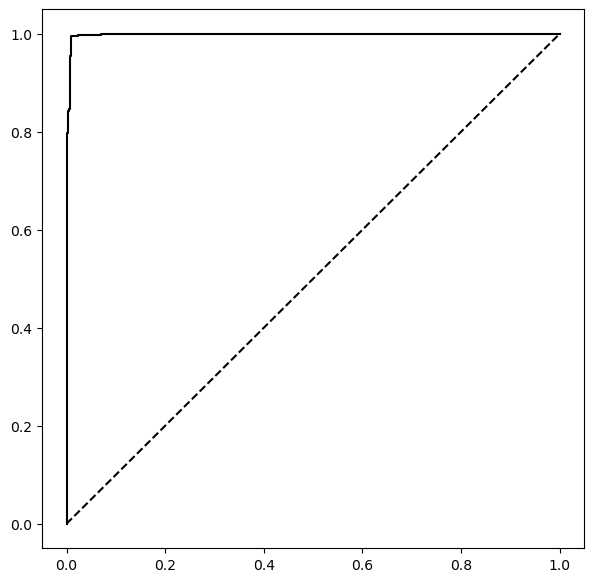

In [125]:
fpr, tpr, ths = roc_curve(y_ts, mlpc.predict_proba(X_ts)[:,1])
plt.figure(figsize=(7,7))
plt.plot(fpr,tpr,'k-')
plt.plot((0,1),(0,1),'k--');

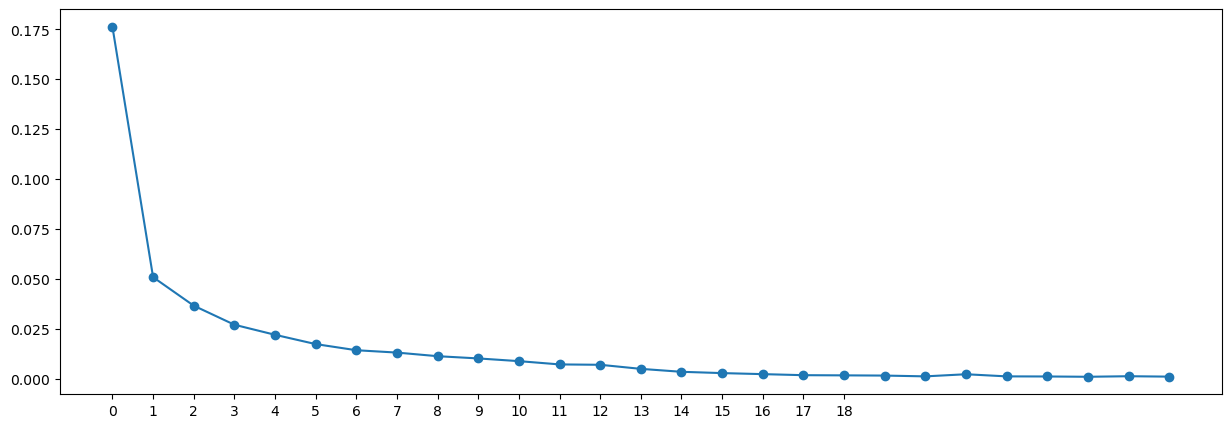

In [297]:
loss = mlpc.best_estimator_.loss_curve_
plt.figure(figsize=(15,5))
plt.plot(loss, 'o-')
plt.xticks(np.arange(19));

In [300]:
start, end = 0, X_val_padronizado.shape[0]
validation = list(y_val[start:end].values)
# print(validation)

In [301]:
prediction = list(mlpc.predict(X_val_padronizado[start:end]))
# print(prediction)

In [305]:
if (validation != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(validation, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "validation", "prediction"])
    print(f'{len(prediction)} registros lidos')
    print('---')
    print(f'{dfp.prediction.shape[0]} tipo(s) de vinho(s) NÃO previstos corretamente!')
    print('---')
    print(dfp.prediction.value_counts())
    display(dfp)
else:    
    print(f'O modelo previu corretamente os resultados em relação a variável "y"')
    print(list(set(validation) - set(prediction)))

1462 registros lidos
---
34 tipo(s) de vinho(s) NÃO previstos corretamente!
---
prediction
0    33
1     1
Name: count, dtype: int64


seq  validation  prediction
0     24           1           0
1     70           1           0
2     83           1           0
3    175           1           0
4    189           1           0
5    206           1           0
6    208           1           0
7    298           1           0
8    315           1           0
9    322           1           0
10   394           1           0
11   418           1           0
12   453           1           0
13   506           1           0
14   537           1           0
15   546           1           0
16   561           1           0
17   588           1           0
18   730           1           0
19   737           1           0
20   781           1           0
21   792           1           0
22   874           0           1
23   887           1           0
24  1025           1           0
25  1033           1           0
26  1054           1           0
27  1068           1           0
28  1152           1           0
29  1195           1           0
30  1215           1           0
31  1220           1           0
32  1402           1           0
33  1419           1           0

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Avaliação geral dos modelos utilizados
        </b>
    <br/>&nbsp;
</center>

In [130]:
dfm = {
    'modelo':['Extra Trees Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier',
              'Logistic Regression', 'Random Forest Classifier', 'Neural Network MLPC'],
    'acurácia':[etc_acuracia,neigh_acuracia,dtc_acuracia,lr_acuracia, rf_acuracia, mlpc_acuracia],
    'f1_score':[etc_f1_score,neigh_f1_score,dtc_f1_score,lr_f1_score, rf_f1_score, mlpc_f1_score]
    }    
modelos = pd.DataFrame(dfm)

# modelos.sort_values('f1_score', ascending=False)
modelos.style.highlight_max(subset=['acurácia','f1_score'])